#Campus Recruitment Prediction With Machine Learning for MBA Students


 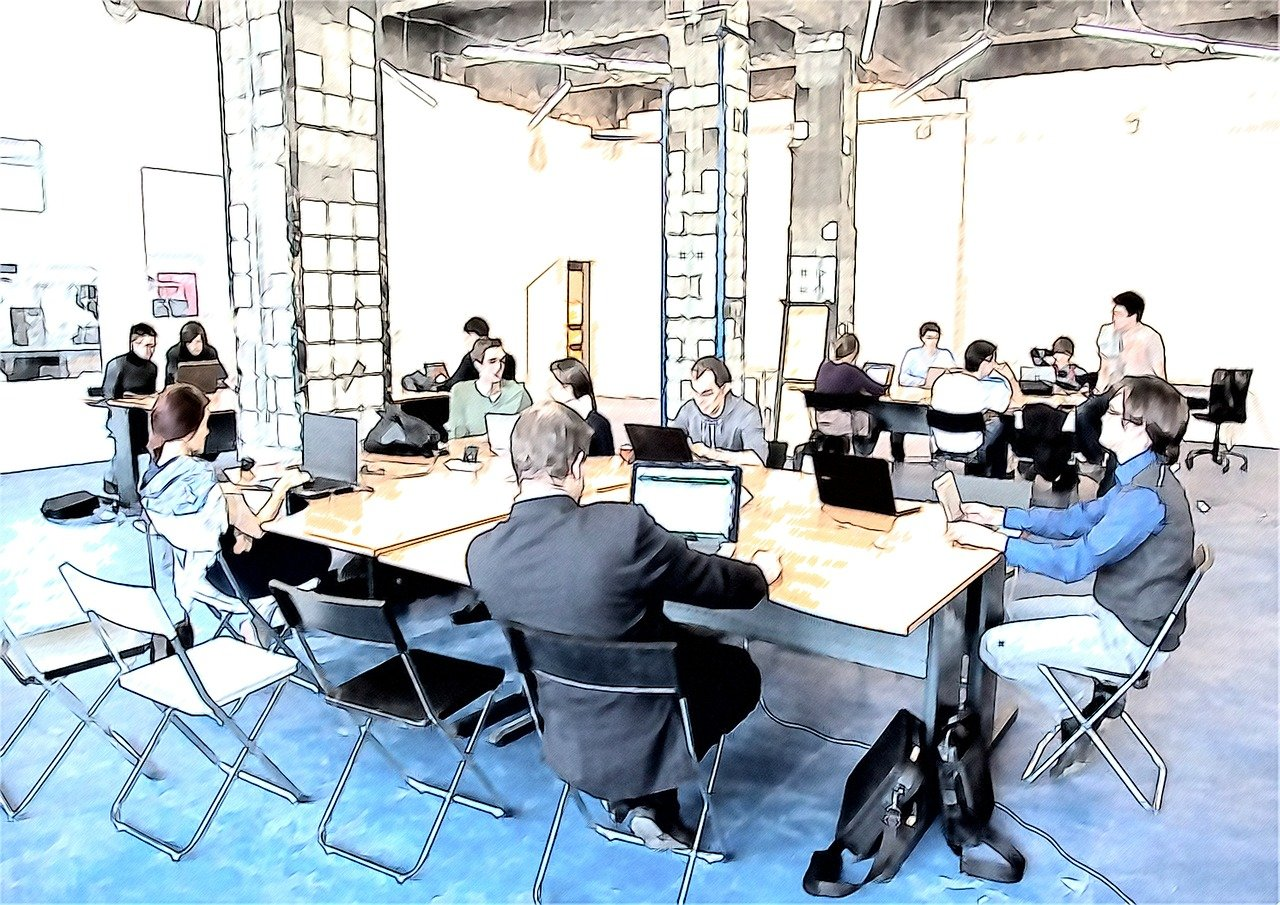

**Student Name:** JATHUSAN U<br>
**Registration Number:** EG/2020/3977 <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [7]:
df = pd.read_csv('D:\\5th SEMI\\EE5253_Assignment_EG20203977\\Placement_Data_Full_Class.csv')


In [8]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop('sl_no', axis=1)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Exploratory Data Analysis (EDA)

In [121]:
# Identify the shape of the loaded dataframe

# Your code goes here
print(df.shape)


(215, 15)


In [9]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:** Categorical Features:
gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status Numerical Features: ssc_p, hsc_p, degree_p, etest_p, mba_p, salary

In [123]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
print(df.describe())


            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**

The main reason for splitting the dataset into train and test sets before doing any visualization is to avoid data leakage. Data leakage occurs when information from the test set is used to influence the training process, which can lead to overfitting and poor generalization.

 We can be confident that the visualizations are based only on the training data and don't disclose any information about the test data by keeping the test set hidden and apart. In this manner, we can also more accurately and unbiased evaluate how well our model performs on the test data.


In the context of data visualization, restricting the analysis to the training set is a common practice aimed at comprehensively exploring and elucidating patterns, relationships, and distributions intrinsic to the training data. This exploration facilitates a deeper understanding of the features from which the model derives its learning during the training phase. Visualization of the training set enables the identification of potential outliers and aids in making informed decisions regarding preprocessing strategies. This focused analysis contributes to a more robust comprehension of the underlying structure of the training data, supporting the refinement of the machine learning model and enhancing its overall performance.



In [124]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
X = df.drop('status', axis=1)  # independent variables
y = df['status']  # dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [125]:
# Print number of training data points

# Your code goes here
print("Number of training data points: ", X_train.shape[0])


Number of training data points:  172


In [126]:
# Print number of testing data points

# Your code goes here
print("Number of testing data points: ", X_test.shape[0])


Number of testing data points:  43


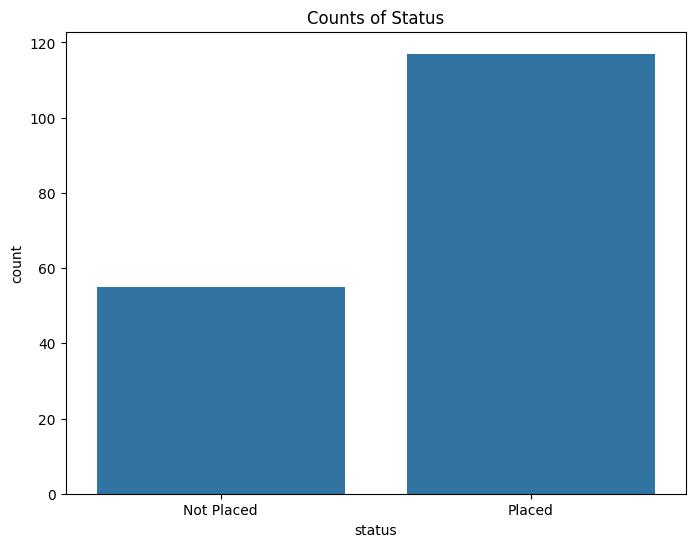

In [127]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=train_data)
plt.title('Counts of Status')
plt.show()



**Q:** Can you recognize that the dataset is imbalanced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** Yes, I can.<br>

Class Imbalance Issues

<br>1.Bias Towards Majority Class:

 Most machine learning algorithms work best when the number of samples in each class are about equal. This is because they are designed to maximize accuracy and reduce error. When one class significantly outweighs the others, the model tends to favor the majority class and the model can become biased towards the majority class, leading to poor performance on the minority class.

 <br> 2.Overfitting:

  The model may overfit to the majority class and perform poorly on the minority class. This is because the model will be exposed to the majority class more often during training, and it may fail to learn important characteristics about the minority class,resulting in poor generalization.

 <br>3.Poor Generalization:

 Imbalanced training data, particularly with underrepresented minority classes, can hinder the model's ability to generalize to diverse datasets. Since the minority class is underrepresented in the training data, the model may not perform well when exposed to more balanced data or data where the minority class is the majority,compromising their adaptability and overall performance on unseen data.



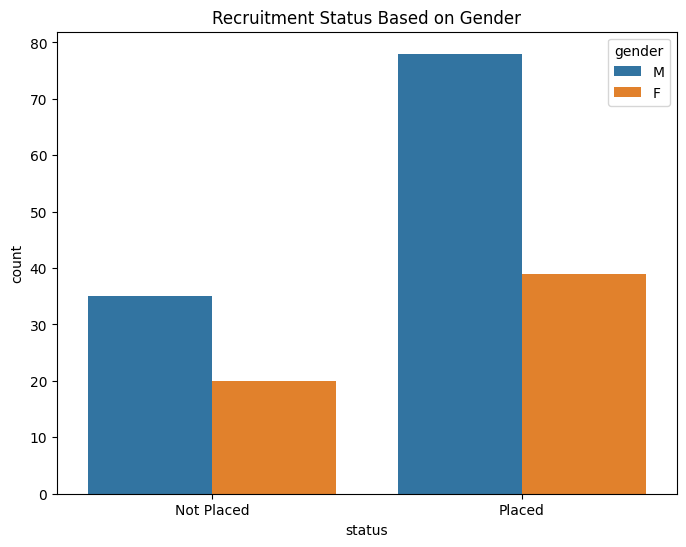

In [128]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='status', hue='gender', data=train_data)
plt.title('Recruitment Status Based on Gender')
plt.show()

**Q:** Explain the observation from the above table.
> **A:**

The bar graph depicts the distribution of recruitment outcomes based on gender. Notably, there is a disparity in placement rates between males and females, with a higher count of placed males and a higher count of males not placed compared to their female counterparts.This could suggest that the recruitment process may be influenced by gender, or it could simply reflect the gender distribution of the candidates.


To draw more conclusive insights, it becomes imperative to incorporate additional contextual information, such as the qualifications, work experience, and the specific field of work for each candidate. By considering these additional factors, a more nuanced understanding of the dynamics influencing recruitment outcomes can be achieved.

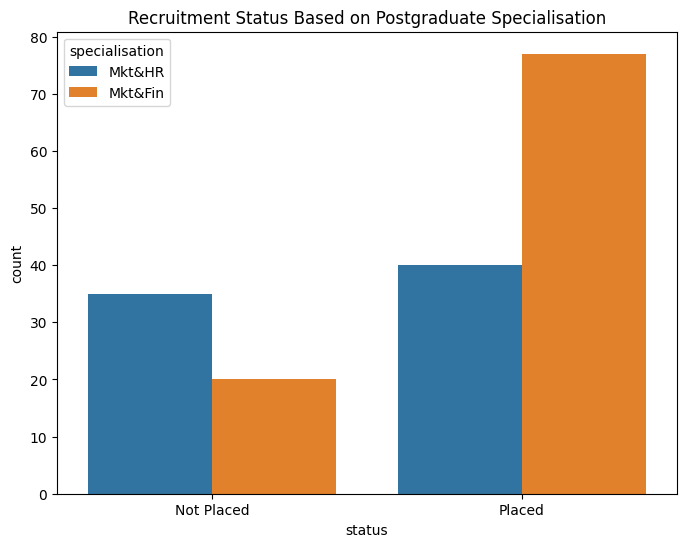

In [129]:


# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
plt.figure(figsize=(8, 6))
sns.countplot(x='status', hue='specialisation', data=train_data)
plt.title('Recruitment Status Based on Postgraduate Specialisation')
plt.show()

**Q:** Inteprete the above results.
> **A:**

The bar graph, labeled "Recruitment Status Based on Postgraduate Specialisation," provides an overview of individuals' placement status categorized by their postgraduate specialisations, namely "Mkt&HR" and "Mkt&Fin."

In the case of the "Mkt&HR" specialisation, approximately 40 individuals exhibit a non-placed status, whereas around 30 individuals have a placed status. Conversely, for the "Mkt&Fin" specialisation, about 20 individuals are not placed, while the placed category includes over 70 individuals.

 These observations indicate that individuals with a "Mkt&Fin" specialisation tend to have a notably higher placement rate compared to their counterparts with a "Mkt&HR" specialisation.

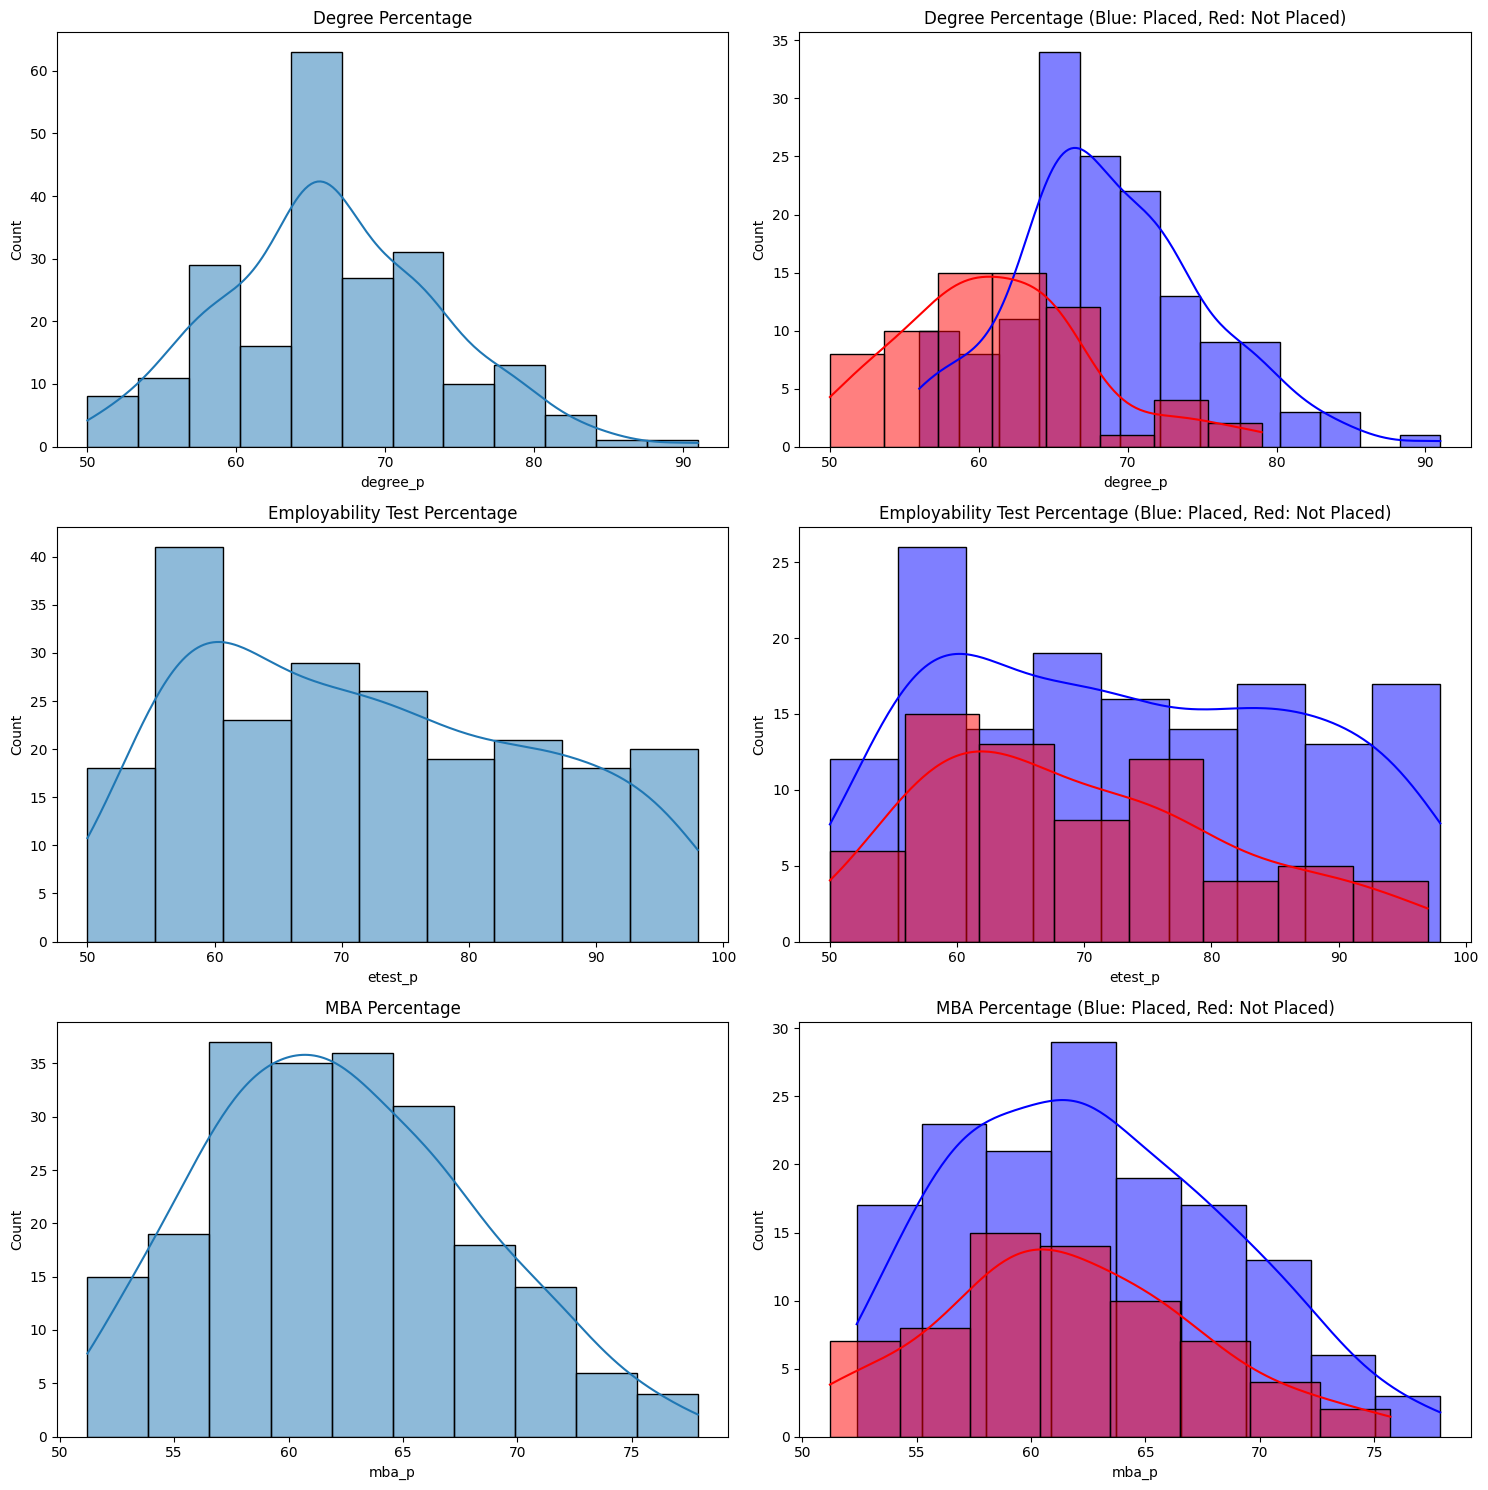

In [130]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot for all data
sns.histplot(df['degree_p'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Degree Percentage')

sns.histplot(df['etest_p'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Employability Test Percentage')

sns.histplot(df['mba_p'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('MBA Percentage')

# Plot based on placement status
sns.histplot(df[df['status'] == 'Placed']['degree_p'], kde=True, ax=axs[0, 1], color='blue')
sns.histplot(df[df['status'] == 'Not Placed']['degree_p'], kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Degree Percentage (Blue: Placed, Red: Not Placed)')

sns.histplot(df[df['status'] == 'Placed']['etest_p'], kde=True, ax=axs[1, 1], color='blue')
sns.histplot(df[df['status'] == 'Not Placed']['etest_p'], kde=True, ax=axs[1, 1], color='red')
axs[1, 1].set_title('Employability Test Percentage (Blue: Placed, Red: Not Placed)')

sns.histplot(df[df['status'] == 'Placed']['mba_p'], kde=True, ax=axs[2, 1], color='blue')
sns.histplot(df[df['status'] == 'Not Placed']['mba_p'], kde=True, ax=axs[2, 1], color='red')
axs[2, 1].set_title('MBA Percentage (Blue: Placed, Red: Not Placed)')

plt.tight_layout()
plt.show()



**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**

The six visualizations depict the distributions of Degree Percentage, Employability Test Percentage, and MBA Percentage. The initial column provides an overview of the overall distributions, while the subsequent column differentiates these distributions based on placement status: "Placed" represented in blue and "Not Placed" in red. The observations suggest that individuals with higher percentages in all three categories tend to have a higher likelihood of being placed.



1. **Degree Percentage:**
   - Concentration of data points around 65% to 75%.
   - Higher degree percentages are more prevalent in the "Placed" category.

2. **Employability Test Percentage:**
   - Broader distribution with peaks around 60%, 75%, and above 85%.
   - Individuals with higher test percentages are more inclined to be placed.

3. **MBA Percentage:**
   - Wide spread with a noticeable peak around 65% to 70%.
   - Elevated MBA percentages correlate with an increased probability of placement.

These visualizations imply that academic performance, as indicated by degree percentage, employability test percentage, and MBA percentage, could serve as a significant determinant for placement. However, it's crucial to note that these are preliminary observations, and further in-depth analysis is warranted to establish any causal relationships.

In [131]:
# Check for the null values in train set

# Your code goes here
print(X_train.isnull().sum())


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64


In [132]:
# Check for the null values in test set

# Your code goes here
print(X_test.isnull().sum())


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64


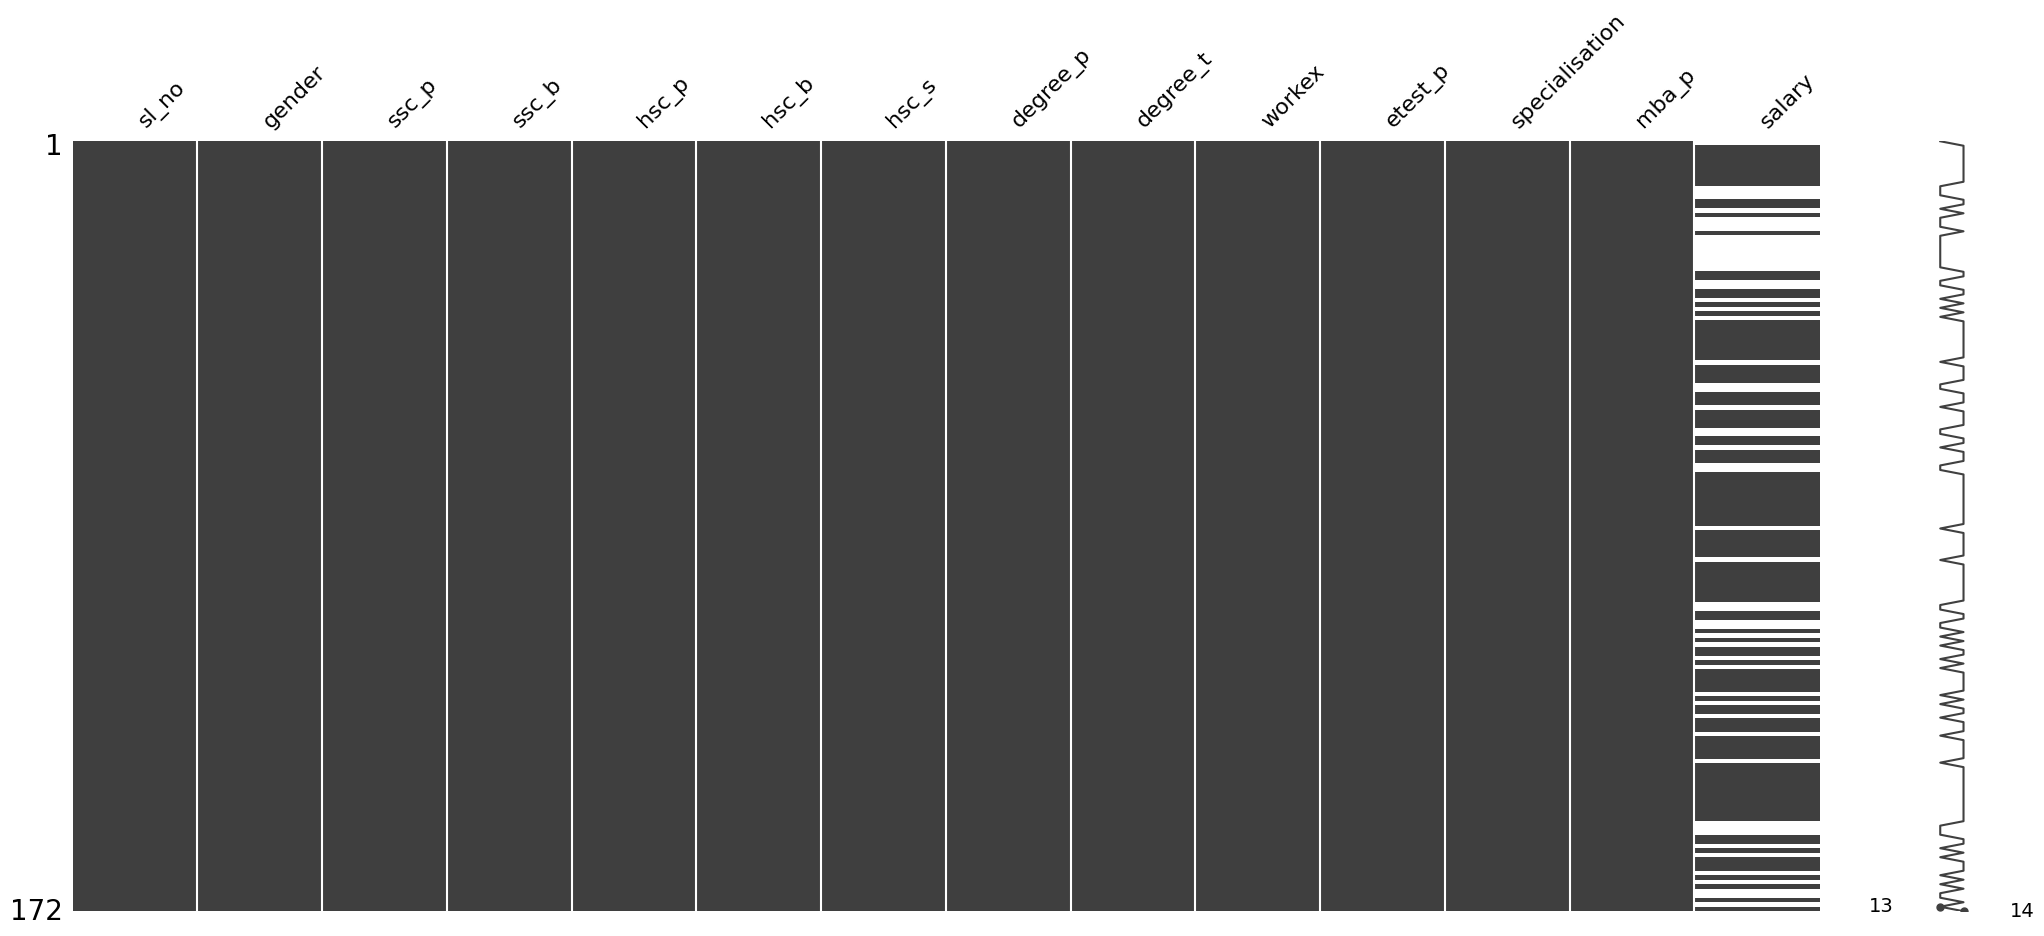

In [133]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
import missingno as msno
msno.matrix(X_train)
plt.show()


## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**

Since ‘salary’ is a numerical feature, we can use median imputation. This method involves replacing the missing values with the median value of the 'salary' column. The median is preferred over the mean, as it is less influenced by outliers and offers a robust measure of central tendency.

Median imputation proves to be a straightforward and efficient approach for addressing missing numerical data. Unlike more complex methods such as predictive modeling, it does not necessitate the construction of a predictive model. This approach is particularly effective when the missing data is not completely random. In this context, it is reasonable to assume that the absent salary values might align closely with the median salary derived from the observed data.

In [134]:
# Handle the missing data

# Your code goes here
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# Fit on the train data
imputer.fit(X_train[['salary']])

# Transform both training and testing data
X_train['salary'] = imputer.transform(X_train[['salary']])
X_test['salary'] = imputer.transform(X_test[['salary']])



In [135]:
# Test the training dataset after processing the null values

# Your code goes here
print(X_train.isnull().sum())



sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [136]:
# Process the null values in the test set

# Your code goes here
# Transform the testing data
X_test['salary'] = imputer.transform(X_test[['salary']])


In [137]:
# Test the testing dataset after processing the null values

# Your code goes here
print(X_test.isnull().sum())


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**

One common method for encoding categorical features is one-hot encoding.This method involves creating binary columns for each category and forming a matrix with the encoded results. One-hot encoding is particularly suitable for categorical variables that are nominal, meaning they lack any inherent order or priority.



When implementing one-hot encoding, it is crucial to execute the encoding after splitting the data into training and testing sets to prevent any form of data leakage. Furthermore, it is imperative to ensure that the categories present in the training set match those in the testing set. If the testing set encompasses categories not found in the training set, appropriate handling is necessary, such as treating them as a distinct "unknown" category. This meticulous approach ensures the integrity of the encoding process and prevents discrepancies between the training and testing datasets.

In [138]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


# List the categorical features

# Your code goes here
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']


# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
column_trans = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough'
)


# Encode the training features

# Your code goes here
column_trans.fit(X_train)
X_train_encoded = column_trans.transform(X_train)


In [139]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train_encoded_df = pd.DataFrame(X_train_encoded)
print(X_train_encoded_df.dtypes)



0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
dtype: object


In [140]:
# Encode the testing features

# Your code goes here
# Encode the testing features
X_test_encoded = column_trans.transform(X_test)

# Convert the encoded testing features to a Pandas DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded)

# Display the encoded testing features
print(X_test_encoded_df.head())



    0    1    2    3    4    5    6    7    8    9   ...   13   14   15  \
0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  0.0   
1  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  1.0  0.0   
2  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0   
4  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  1.0  0.0   

      16    17    18    19     20     21        22  
0  201.0  69.0  60.0  65.0  87.55  52.81  300000.0  
1  213.0  67.0  67.0  73.0  59.00  69.72  295000.0  
2  139.0  82.0  64.0  73.0  96.00  71.77  250000.0  
3  177.0  59.0  60.0  56.0  55.00  57.90  220000.0  
4   16.0  65.0  75.0  69.0  72.00  64.66  200000.0  

[5 rows x 23 columns]


In [141]:
# Encode the target variable in train and test sets

# Your code goes here
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable in the testing set
y_test_encoded = label_encoder.transform(y_test)

# Print the first few entries of the encoded target variable in the training set
print("Encoded Target Variable (Training Set):")
print(y_train_encoded[:5])

# Print the first few entries of the encoded target variable in the testing set
print("\nEncoded Target Variable (Testing Set):")
print(y_test_encoded[:5])



Encoded Target Variable (Training Set):
[0 1 1 1 1]

Encoded Target Variable (Testing Set):
[1 1 1 1 1]


In [142]:
# Print the encoded labels for the training set

# Your code goes here

# Print the encoded labels for the training set
print("Encoded Labels for the Training Set:")
print(y_train_encoded)


Encoded Labels for the Training Set:
[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Scale the Numerical Features

In [143]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical features
numerical_features = X_train_encoded_df.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_encoded_df[numerical_features])

# Transform the testing set numerical features
X_test_scaled_numerical = scaler.transform(X_test_encoded_df[numerical_features])

# Create DataFrames with the scaled numerical features
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features)






In [144]:
# Display the head of the scaled training set
# Display the first few rows of the scaled numerical features in the training set
print("Scaled Numerical Features (Training Set):")
print(X_train_scaled_numerical_df.head())

Scaled Numerical Features (Training Set):
         0         1         2         3         4         5         6   \
0 -0.722581  0.722581  0.965704 -0.965704  1.315355 -1.315355 -0.261387   
1 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
2 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
3 -0.722581  0.722581 -1.035514  1.035514  1.315355 -1.315355 -0.261387   
4 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   

         7         8         9   ...        13        14        15        16  \
0  0.943456 -0.828417  0.685628  ... -0.704026 -1.137248  1.137248 -0.178098   
1 -1.059932  1.207122 -1.458517  ...  1.420403  0.879316 -0.879316 -0.321689   
2  0.943456 -0.828417  0.685628  ...  1.420403  0.879316 -0.879316 -0.146189   
3  0.943456 -0.828417  0.685628  ... -0.704026 -1.137248  1.137248  0.523904   
4  0.943456 -0.828417  0.685628  ... -0.704026  0.879316 -0.879316  1.688589   

         17        18     

In [145]:
# Display the head of the scaled testing set
# Display the first few rows of the scaled numerical features in the testing set
print("\nScaled Numerical Features (Testing Set):")
print(X_test_scaled_numerical_df.head())


Scaled Numerical Features (Testing Set):
         0         1         2         3         4         5         6   \
0 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
1 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
2  1.383927 -1.383927 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
3  1.383927 -1.383927  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
4  1.383927 -1.383927  0.965704 -0.965704  1.315355 -1.315355 -0.261387   

         7         8         9   ...        13        14        15        16  \
0  0.943456 -0.828417  0.685628  ... -0.704026  0.879316 -0.879316  1.529043   
1  0.943456 -0.828417  0.685628  ...  1.420403  0.879316 -0.879316  1.720498   
2 -1.059932  1.207122 -1.458517  ...  1.420403  0.879316 -0.879316  0.539859   
3  0.943456 -0.828417  0.685628  ... -0.704026 -1.137248  1.137248  1.146133   
4  0.943456 -0.828417  0.685628  ...  1.420403  0.879316 -0.879316 -1.422555   

         17        18     

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>

> **A1:**

SMOTE, an acronym for Synthetic Minority Oversampling Technique, stands out as a prevalent strategy for mitigating class imbalance challenges in machine learning.

The SMOTE algorithm works by generating synthetic examples in the feature space1. For a given observation, it selects examples that are close in the feature space, draws a line between these examples, and creates a new sample at a point along that line1.To elaborate, for every sample belonging to the minority class, the algorithm randomly picks one or more of its k-nearest neighbors and generates new samples through interpolation along the line formed by these selected neighbors. This methodology effectively introduces synthetic instances to balance the class distribution, enhancing the model's capability to address imbalanced datasets.<br>


> **A2 (Advantage):**

The primary advantage of SMOTE (Synthetic Minority Over-sampling Technique) over other oversampling techniques lies in its ability to address and alleviate overfitting issues.

SMOTE achieves this by introducing synthetic instances to the minority class, which effectively expands the dataset. This oversampling technique not only balances class distribution but also mitigates the risk of overfitting, a common concern in machine learning.

Overfitting occurs when a model learns the training data too well, capturing noise and idiosyncrasies that may not generalize well to unseen data.

By generating synthetic samples based on the existing minority class instances, SMOTE provides the model with additional diverse examples, reducing the likelihood of overfitting. This leads to a more robust and generalizable model that can perform well on new, unseen data.

In [146]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here

from imblearn.over_sampling import SMOTE

# Initialize the SMOTE oversampler
smote = SMOTE(random_state=42)

# Oversample the training set
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled_numerical, y_train_encoded)


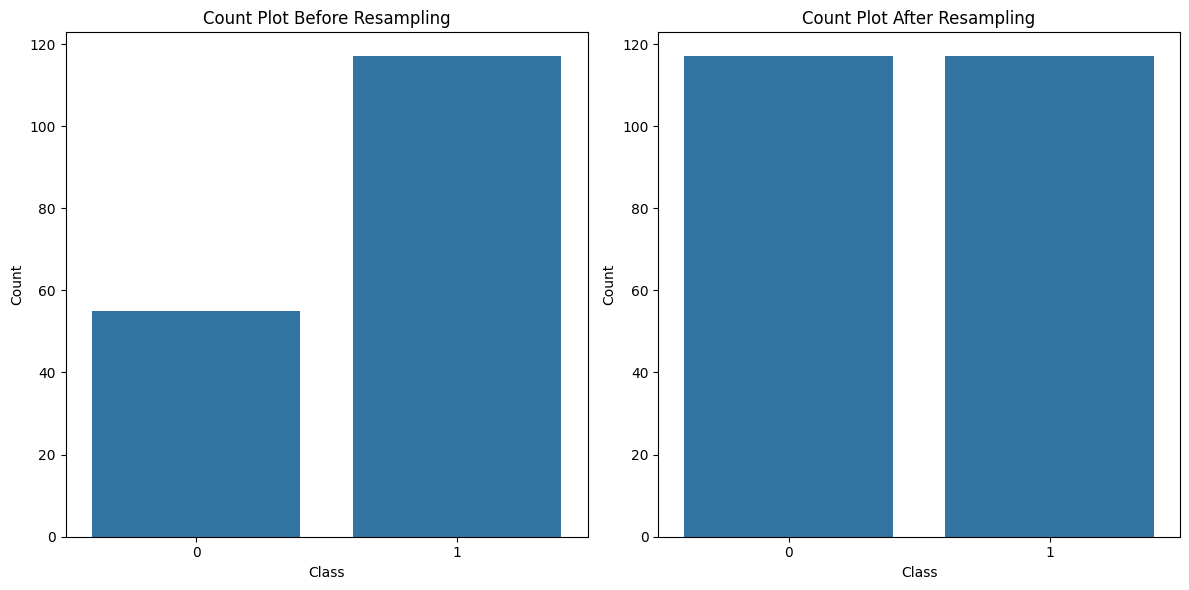

In [147]:
# plot the count plots side by side before and after resampling

# Your code goes here

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
plt.figure(figsize=(12, 6))

# Plot count plot before resampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_encoded)
plt.title('Count Plot Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot count plot after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_oversampled)
plt.title('Count Plot After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**

No, we should not oversample the testing set. The purpose of oversampling techniques like SMOTE is to balance the training dataset to improve model learning and performance.

Oversampling, such as using techniques like SMOTE, should only be applied to the training set and not to the testing set. The primary goal of oversampling is to address class imbalance and improve the model's ability to learn from the training data.

The testing set should remain untouched and reflect the real-world distribution of classes to provide an unbiased evaluation of the model's performance. Introducing oversampling in the testing set could introduce artificial patterns that do not align with real-world scenarios, leading to overly optimistic performance metrics. This practice could result in inflated expectations of the model's effectiveness when applied to new, unseen data.

Hence, it is indeed a best practice to confine oversampling techniques to the training data only, ensuring a more accurate representation of the model's generalization capabilities.






The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [148]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [149]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define the steps in the pipeline
steps = [
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42, probability=True))
]

# Create the imbalanced pipeline
imbalanced_pipeline = Pipeline(steps)

# Display the imbalanced pipeline
print(imbalanced_pipeline)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(probability=True, random_state=42))])


In [150]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold

# Define the number of folds
num_folds = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Display the StratifiedKFold
print(stratified_kfold)


StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**

Stratified K-Folds cross-validation is a cross-validation technique that constructs folds while preserving the percentage of samples for each class. This approach becomes especially crucial when dealing with imbalanced datasets, where certain classes may have fewer instances compared to others.

The significance of Stratified K-Folds cross-validation lies in its capability to retain the same class distribution in each fold as in the entire dataset. By doing so, it ensures that every fold serves as a representative subset of the overall dataset, contributing to more dependable and resilient model evaluation. This method is particularly beneficial in scenarios where imbalanced class distribution could potentially impact the model's ability to generalize across different folds. Stratified K-Folds helps maintain fairness in the representation of each class during the cross-validation process, ultimately leading to more accurate and unbiased assessments of model performance.

In [151]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Range of values for the regularization parameter C
    'classifier__kernel': ['linear', 'rbf']  # Kernels to be tested
}

# Display the parameter grid
print(param_grid)


{'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}


In [152]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=imbalanced_pipeline, param_grid=param_grid, scoring='accuracy', cv=stratified_kfold, verbose=1, n_jobs=-1)

# Display the GridSearchCV instance
print(grid_search)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)


In [153]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
# Fit the GridSearchCV instance to the imbalanced training data
grid_search.fit(X_train_scaled_numerical, y_train_encoded)
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Display the best cross-validated accuracy score
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)

# Display the best trained model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best Cross-Validated Accuracy Score: 0.8541176470588235


Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [154]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
# Print the mean cross-validated score of the best estimator (Accuracy)
print("Mean Cross-Validated Score (Accuracy):", grid_search.best_score_)


Mean Cross-Validated Score (Accuracy): 0.8541176470588235


In [155]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
# Print the best hyperparameters detected from the grid search
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}


In [156]:
# Obtain the best estimator selected from the grid search

# Your code goes here
# Obtain the best estimator selected from the grid search
best_estimator = grid_search.best_estimator_

# Display the best estimator
print("Best Estimator:")
print(best_estimator)


Best Estimator:
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])


### Model Evaluation

In [157]:
# Fit the best estimator to the whole training dataset

# Your code goes here
# Fit the best estimator to the whole training dataset
best_estimator.fit(X_train_scaled_numerical, y_train_encoded)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [158]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
from sklearn.metrics import accuracy_score

# Predictions on the complete training set using the best estimator
y_train_pred = best_estimator.predict(X_train_scaled_numerical)

# Calculate the accuracy
accuracy = accuracy_score(y_train_encoded, y_train_pred)

# Display the accuracy
print("Accuracy on the Complete Training Set:", accuracy)


Accuracy on the Complete Training Set: 0.8837209302325582


In [159]:
# Calculate the accuracy for the test set

# Your code goes here
from sklearn.metrics import accuracy_score

# Predictions on the test set using the best estimator
y_test_pred = best_estimator.predict(X_test_scaled_numerical)

# Calculate the accuracy for the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)

# Display the accuracy for the test set
print("Accuracy on the Test Set:", accuracy_test)


Accuracy on the Test Set: 0.8837209302325582


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**

The model has demonstrated an accuracy of approximately 88.37% on both the training and test sets.

When a model exhibits similar performance on both the training and test sets, it is typically indicative of a model that is not overfitting. Overfitting commonly occurs when a model excels on the training set but struggles on the test set, as it has memorized the training data, incorporating noise and outliers that hinder its adaptability to new, unseen data.

In this instance, the close alignment between the model's performance on the test set and the training set suggests effective generalization to new data and a lack of overfitting. Nevertheless, it is prudent to evaluate the model using additional metrics such as precision, recall, F1 score, and leverage domain knowledge for a comprehensive assessment of its performance. While accuracy provides an overall measure, these metrics offer insights into specific aspects of the model's effectiveness.

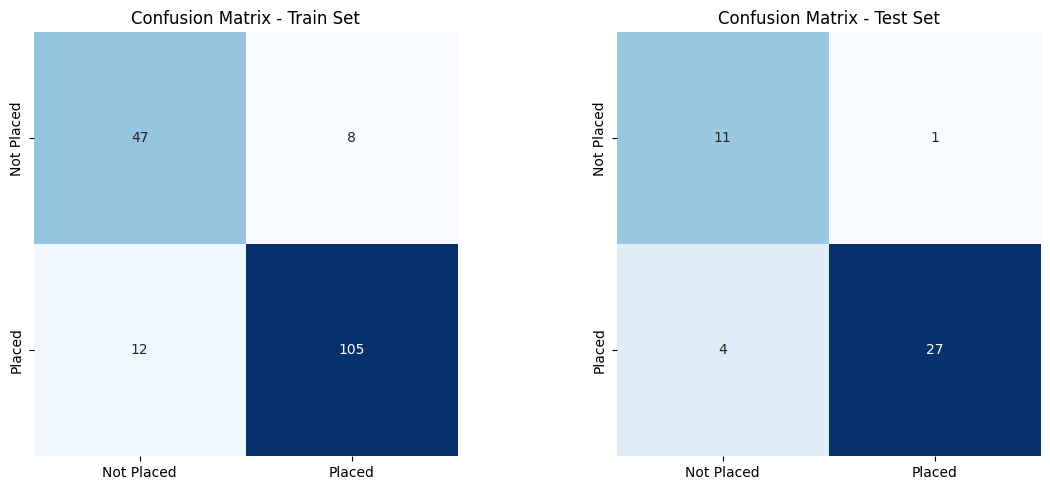

In [160]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for the train set
conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

# Plotting side by side
plt.figure(figsize=(12, 5))

# Plot confusion matrix for the train set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix - Train Set')

# Plot confusion matrix for the test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix - Test Set')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:**The confusion matrices for both the train and test sets show the performance of a classification model in predicting whether individuals are placed or not placed.

For the training set:

True Negatives (Not Placed/Not Placed): 47
False Positives (Not Placed/Placed): 8
False Negatives (Placed/Not Placed): 12
True Positives (Placed/Placed): 105

For the test set:

True Negatives (Not Placed/Not Placed): 11
False Positives (Not Placed/Placed): 1
False Negatives (Placed/Not Placed): 4
True Positives (Placed/Placed): 27

The model has a higher accuracy in predicting those who are placed compared to those who are not. The number of false positives and false negatives is relatively low, indicating that the model has a good balance between precision and recall. However, there’s still room for improvement, especially in correctly identifying those who are not placed. It’s also important to consider other performance metrics and the context of the problem for a comprehensive evaluation.

In [161]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report

# Generate the classification report for the test set
classification_rep = classification_report(y_test_encoded, y_test_pred)

# Display the classification report
print("Classification Report - Test Set:\n", classification_rep)


Classification Report - Test Set:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.96      0.87      0.92        31

    accuracy                           0.88        43
   macro avg       0.85      0.89      0.87        43
weighted avg       0.90      0.88      0.89        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. For class 0, the precision is 0.73, and for class 1, it’s 0.96.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in actual class. The recall for class 0 is 0.92, and for class 1, it’s 0.87.

F1 score: The F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. The F1 score is 0.81 for class 0 and 0.92 for class 1.

Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, support is 12, and for class 1, it’s 31.

Accuracy: Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observation to the total observations. The accuracy of the model is 0.88.

Macro Avg: Macro-average will compute the metric independently for each class and then take the average treating all classes equally.

Weighted Avg: In weighted average, each class’s metric is calculated with respect to how many samples there are in the class. This can be useful if there is a class imbalance.


From the report, we can see that the model has a high precision and recall for class 1, indicating good performance in predicting the positive class. However, the precision is relatively lower for class 0, suggesting that the model might be misclassifying some actual negatives as positives. The overall accuracy of the model is quite high (0.88), indicating that the model is performing well on the test set. However, the model’s performance should also be evaluated using other metrics and domain knowledge for a comprehensive understanding.

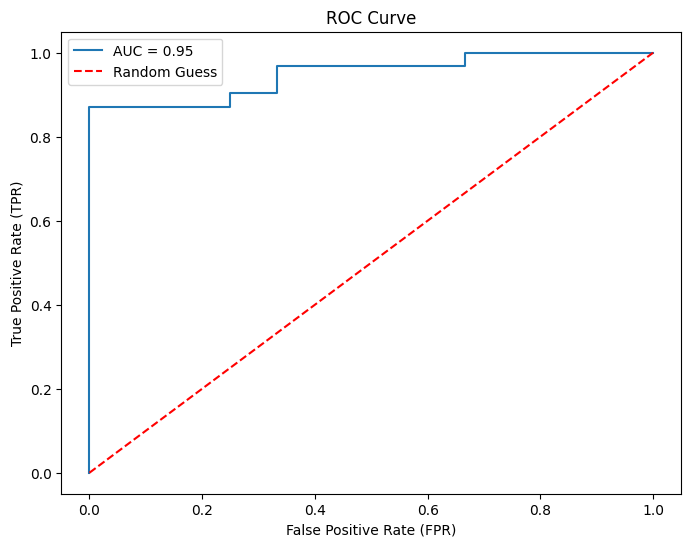

Area Under Curve (AUC): 0.9489247311827957


In [162]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtain predicted probabilities for the positive class (Placed)
y_test_probs = best_estimator.predict_proba(X_test_scaled_numerical)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_probs)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test_encoded, y_test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Print the AUC value
print("Area Under Curve (AUC):", auc)


**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**The **ROC curve** (Receiver Operating Characteristic curve) is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The closer the ROC curve is to the top left corner, the better the model's ability to distinguish between the classes.

The **AUC** (Area Under the Curve) value is the area under the ROC curve. It provides an aggregate measure of the model's performance across all possible classification thresholds. AUC can be interpreted as the probability that the model will rank a random positive example more highly than a random negative example. The AUC value ranges from 0 to 1, where 1 indicates a perfect classifier and 0.5 represents a model that is no better than random guessing.

In our case, the AUC value is approximately 0.95, which is very close to 1. This suggests that the model has excellent discriminatory power and is capable of distinguishing between positive and negative classes effectively. The ROC curve is significantly above the diagonal line representing random guess, showcasing that this particular model's predictions are highly reliable. However, it's always a good idea to check other metrics and use domain knowledge for a comprehensive evaluation of the model's performance.